In [1]:
import cv2
import numpy as np
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

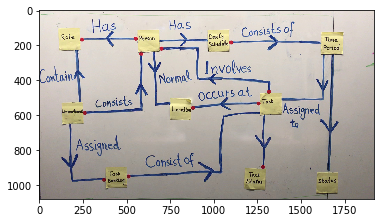

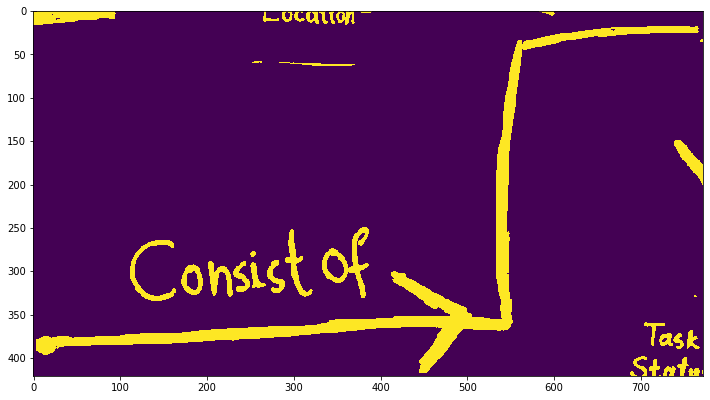

In [6]:
def show_image(*image):
  IMAGE_SIZE = (12, 8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image[0])
  if len(image)>1 : plt.title(image[1])
  plt.show()

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

image = Image.open("/Users/ankitkpr93/UTS projects/codebot/363/IMG_0324_0.jpeg")
(H,W)=image.size[:2]
image_np = load_image_into_numpy_array(image)
plt.imshow(image_np,cmap="gray")
subset = image_np[566:987,499:1271]
subset = cv2.cvtColor(subset,cv2.COLOR_RGB2GRAY)
ret, imgf = cv2.threshold(subset, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#cv2.rectangle(image_np, (499, 566), (1271, 987), (255, 0, 255), 3,5)
image_np_expanded = np.expand_dims(image_np, axis=0)
show_image(imgf)
cv2.imwrite("original_binary.jpg",imgf)
plt.show()

In [8]:
size = np.size(imgf)
skel = np.zeros(imgf.shape,np.uint8)
 
ret,img = cv2.threshold(imgf,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
cv2.imwrite("skeleton.jpg",skel)
#cv2.imshow("skel",skel)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

True

(-0.5, 771.5, 420.5, -0.5)

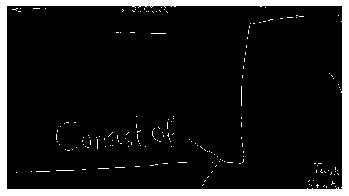

In [14]:
from skimage.morphology import skeletonize, thin
imgf=imgf/255
thinned = thin(imgf)
plt.imshow(thinned, cmap=plt.cm.gray)
#cv2.imwrite("thinnned.jpg",thinned)
#plt.set_title('thinned')
plt.axis('off')

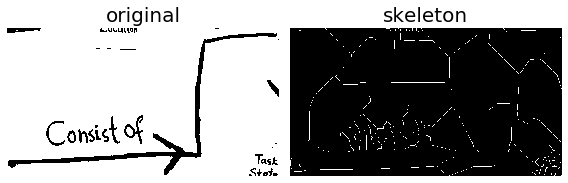

In [37]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
imgf=imgf/255
image = invert(imgf)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)


ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()


In [ ]:
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[0]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 255
    cv2.imshow("Biggest component", img2)
    cv2.waitKey()
undesired_objects(imgf)